To test a classifier's generalizability, or its ability to provide accurate predictions on data it wasn't trained on, we use cross-validation techniques. Cross-validation involves splitting historical data into:

    a training set -- which we use to train the classifer,
    a test set -- which we use to evaluate the classifier's effectiveness using various measures.

Cross-validation is an important step that should be utilized after training any kind of machine learning model. In this mission, we'll focus on using cross-validation for evaluating a binary classification model.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
admissions["actual_label"] = admissions["admit"]
admissions = admissions.drop("admit", axis=1)

print(admissions.head())

        gpa         gre  actual_label
0  3.177277  594.102992             0
1  3.412655  631.528607             0
2  2.728097  553.714399             0
3  3.093559  551.089985             0
4  3.141923  537.184894             0


Accuracy

Now that we've split up the dataset into a training and a test set, we can:

    train a logistic regression model on just the training set,
    use the model to predict labels for the test set,
    evaluate the accuracy of the predicted labels for the test set.

Recall that accuracy helps us answer the question:

    What fraction of the predictions were correct (actual label matched predicted label)?


In [4]:
import numpy as np
np.random.seed(8)

shuffled_index = np.random.permutation(admissions.index) #shuffle the index of the dataframe
shuffled_admissions = admissions.loc[shuffled_index] # new dataframe with shuffled index
train = shuffled_admissions.iloc[0:515] # first 80% rows as training data
test = shuffled_admissions.iloc[515:len(shuffled_admissions)] # rest 20% as testing data

lr=LogisticRegression()
lr.fit(train[["gpa"]],train["actual_label"]) #fitting on the training set
labels=lr.predict(test[["gpa"]])             #predicting on the testitng set

test["predicted_label"] = labels             # creating a new column for the predicted values
matches = test["predicted_label"] == test["actual_label"] # renaming the admit column to actual predicted values
correct_predictions = test[matches]
accuracy = float(len(correct_predictions)) / float(len(test))
print(accuracy)

0.635658914729


C:\Users\kknagara\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



    Sensitivity helps us answer the question:
        How effective is this model at identifying positive outcomes?
        Of all of the students that should have been admitted (True Positives + False Negatives), how many did the model correctly admit (True Positives)?
    Specificity helps us answer the question:
        How effective is this model at identifying negative outcomes?
        Of all of the applicants who should have been rejected (False Positives + True Negatives), what proportion were correctly rejected (just True Negatives).



In [5]:
true_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 1)
true_positives = len(test[true_positive_filter])
false_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 1)
false_negatives = len(test[false_negative_filter])

sensitivity = float(true_positives) / float(true_positives + false_negatives)
print(sensitivity)

false_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 0)
false_positives = len(test[false_positive_filter])
true_negative_filter=(test["predicted_label"]==0) & (test["actual_label"]==0)
true_negatives = len(test[true_negative_filter])

specificity = float(true_negatives) / float(false_positives + true_negatives)
print(specificity)

0.0833333333333
0.962962962963


 False positive rate

It turns out that our test set achieved a sensitivity value of 8.3, compared to a sensitivity value of 12.7% from the previous mission, and a specificity value of 96.3%, which matches the specificity value of 96.3% from the previous mission. We have a little more evidence now that our logistic regression model is able to generalize to new data.
These 2 rates describe how well the model accepts the right students and how poorly it rejects the wrong one:

    True Positive Rate (TPR): The proportion of students that were admitted that should have been admitted.
    False Positive Rate(FPR): The proportion of students that were accepted that should have been rejected.


ROC curve

We can vary the discrimination threshold and calculate the TPR and FPR for each value. This is called an ROC curve, which stands for receiver operator curve, and it allows us to understand a classification model's performance as the discrimination threshold is varied. To calculate the TPR and FPR values at each discrimination threshold, we can use the scikit-learn roc_curve function. This function will calculate the false positive rate and true positive rate for varying discrimination thresholds until both reach 0%.

This function takes 2 required parameters:

    y_true: list of the true labels for the observations,
    y_score: list of the model's probability scores for those observations.




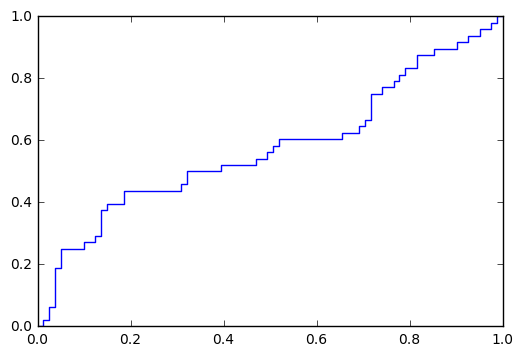

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
probabilities=lr.predict_proba(test[["gpa"]])
fpr,tpr,thresholds=roc_curve(test["actual_label"],probabilities[:,1])
plt.plot(fpr,tpr)
plt.show()

Area under curve (AUC)
The AUC describes the probability that the classifier will rank a random positive observation higher than a random negative observation. Since randomly guessing converges to a probability of 0.5, the higher the AUC the more accurate the model seems to be.

To calculate the AUC, we can use the scikit-learn function roc_auc_score, which takes the same parameters as the roc_curve function and returns a single float value corresponding to the AUC.

In [10]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(test["actual_label"],probabilities[:,1])
print(auc_score)

0.577932098765
